In [1]:
from matplotlib import pyplot as plt
from neo.rawio import IntanRawIO as intanIO
from scipy import signal
import pandas as pd
import numpy as np
from scipy.integrate import simps
import os

#### Define probe channels per shank

In [2]:
A32_4x8 = {'shank_4' : [5, 11, 12, 10, 4, 14, 3, 6], 'shank_3' : [8, 13, 9, 2, 7, 15, 1, 0],         # Shank numbering is right most to left
           'shank_2' : [29, 24, 18, 19, 31, 23, 16, 28], 'shank_1' :[27, 17, 22, 21, 20, 26, 25, 30]} # That is from medial to lateral

In [3]:
new_dir = "/Volumes/Seagate Expansion Drive/Intan_Exp/140921_WT_92_5_Fem_Pl/WT_Fem_Pl_Gating_210914_171721/"
new_files = os.listdir(new_dir)[10:139]


#### La longitud del shank permite la cobertura de CA1-CA3

### Estimulación auditiva

#### Cambio de dosis de anestesia: máxima dosis 1.3 g/kg 


In [58]:
sweep = new_dir + new_files[0]
reader = intanIO(filename = sweep)

In [59]:
reader.parse_header()

### Verifying recording properties

In [65]:
reader.header

{'nb_block': 1,
 'nb_segment': [1],
 'signal_channels': array([('A-000',  0, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-001',  1, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-002',  2, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-003',  3, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-004',  4, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-005',  5, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-006',  6, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-007',  7, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-008',  8, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-009',  9, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-010', 10, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-011', 11, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        ('A-012', 12, 25000., 'uint16', 'uV', 1.9500e-01, -6389.76, 0),
        (

#### All channels with analog singal checked; 32
#### Accelerometer signals checked; 3
#### Triger signal checked; 1

In [87]:
for ii in range(0, 36):
    name = reader.header['signal_channels'][ii][0]
    size = reader.get_signal_size(block_index=0, seg_index=0,channel_indexes = [ii])
    print(f'{name}; size: {size}')

A-000; size: 55040
A-001; size: 55040
A-002; size: 55040
A-003; size: 55040
A-004; size: 55040
A-005; size: 55040
A-006; size: 55040
A-007; size: 55040
A-008; size: 55040
A-009; size: 55040
A-010; size: 55040
A-011; size: 55040
A-012; size: 55040
A-013; size: 55040
A-014; size: 55040
A-015; size: 55040
A-016; size: 55040
A-017; size: 55040
A-018; size: 55040
A-019; size: 55040
A-020; size: 55040
A-021; size: 55040
A-022; size: 55040
A-023; size: 55040
A-024; size: 55040
A-025; size: 55040
A-026; size: 55040
A-027; size: 55040
A-028; size: 55040
A-029; size: 55040
A-030; size: 55040
A-031; size: 55040
A-AUX1; size: 13760
A-AUX2; size: 13760
A-AUX3; size: 13760
ANALOG-IN-07; size: 55040


### All analog signals are same size, including trigger from Master-8 (ANALOG-IN-07)

In [88]:
sf = reader.get_signal_sampling_rate(channel_indexes= [0]) # Any signal channel suffices, not AUX channel though
rec_size = reader.get_signal_size(block_index=0, seg_index=0,channel_indexes = [0])

In [98]:
# Time vector
time = np.arange(-1.0 , (rec_size/sf)-1, 1/sf)

#### Let's check trigger signal

In [93]:
analog_1 = reader.get_analogsignal_chunk(block_index=0, seg_index=0,channel_indexes=[35], i_start = 0, i_stop = rec_size)
analog_scaled = reader.rescale_signal_raw_to_float(analog_1, dtype='float64', channel_indexes= [35])

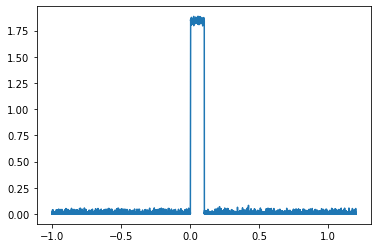

In [99]:
plt.plot(time, analog_scaled)

# Sweeps have different sizes!!!

In [102]:
for file in new_files:
    sweep = new_dir + file
    reader = intanIO(filename = sweep)
    reader.parse_header()
    print(reader.get_signal_size(block_index=0, seg_index=0,channel_indexes = [0]))

55040
55168
55040
55040
55168
55040
55040
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040
55040
55168
55040


## But are aligned to trigger properly

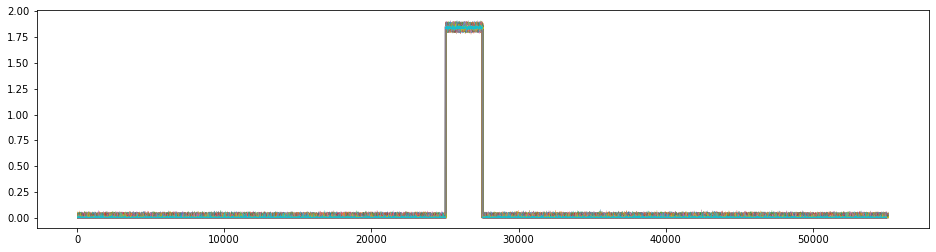

In [145]:
plt.figure(figsize = (16, 4))
triggers = []
for file in new_files:
    sweep = new_dir + file
    reader = intanIO(filename = sweep)
    reader.parse_header()
    size = reader.get_signal_size(block_index=0, seg_index=0,channel_indexes = [0])
    analog_1 = reader.get_analogsignal_chunk(block_index=0, seg_index=0,channel_indexes=[35], i_start = 0, i_stop = size)
    analog_scaled = reader.rescale_signal_raw_to_float(analog_1, dtype='float64', channel_indexes= [35])
    trigger_id, _ = signal.find_peaks(analog_scaled.flatten(), height = 1.5)
    triggers.append(trigger_id[0])
    plt.plot(analog_scaled, linewidth = 0.2)
    

In [122]:
p, _ = signal.find_peaks(analog_scaled.flatten(), height = 1.5)

In [146]:
np.nonzero(analog_scaled > 1.5)

(array([25040, 25041, 25042, ..., 27533, 27534, 27535]),
 array([0, 0, 0, ..., 0, 0, 0]))

### Test for Auditory Evoked Potential (AEP)

#### One shank (No. 3); Second from right to left

In [2]:
# low pass filter
fNQ = 25000 / 2               # Determine the Nyquist frequency.
n = 10                     # Define the filter order
Wn = 350 / fNQ                  # ... and specify the cutoff frequency,
b = signal.butter(n, Wn, 'low')              # ... build lowpass filter.


NameError: name 'sig' is not defined

In [5]:
time_roi = np.arange(-0.1, (27500/25000)-0.1, 1/25000)

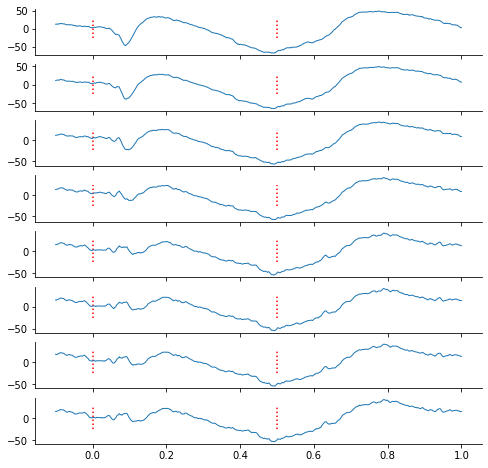

In [6]:
shank_mat = np.zeros((8, 150, 27500))

for file_idx, file in enumerate(new_files):
    sweep = new_dir + file
    reader = intanIO(filename = sweep)
    reader.parse_header()
    size = reader.get_signal_size(block_index=0, seg_index=0,channel_indexes = [0]) # get the size of recording
    analog_1 = reader.get_analogsignal_chunk(block_index=0, seg_index=0,channel_indexes=[35], i_start = 0, i_stop = size) # read analog_in
    analog_scaled = reader.rescale_signal_raw_to_float(analog_1, dtype='float64', channel_indexes= [35])
    trigger_id, _ = signal.find_peaks(analog_scaled.flatten(), height = 1.5) # find trigger signal
    roi = (trigger_id[0]-2500, trigger_id[0]+25000) # region of interest within recording (100 ms before trigger to 1 sec after)

    for ch_idx, channel in enumerate(A32_4x8['shank_2']):
        raw_sig = reader.get_analogsignal_chunk(block_index=0, seg_index=0,channel_indexes=[channel], i_start = roi[0], i_stop = roi[1]) # read analog_in
        sig_scaled = reader.rescale_signal_raw_to_float(raw_sig, dtype='float64', channel_indexes= [channel])
        lfp = signal.filtfilt(b[0], b[1], sig_scaled, axis = 0) # Zero-phase filter each trial
        
        shank_mat[ch_idx, file_idx, :] = lfp.flatten()-lfp.flatten().mean()

shank_mean = shank_mat.mean(1)

fig, axs = plt.subplots(nrows = 8, ncols = 1, sharex = True, figsize = (8, 8))
for ax_id, ax in enumerate(axs):
    ax.plot(time_roi, shank_mean[ax_id, :], linewidth = 1)
    ax.vlines(x = 0.0, ymin = -25, ymax = 25, colors='r', linestyles='dotted')
    ax.vlines(x = 0.5, ymin = -25, ymax = 25, colors='r', linestyles='dotted')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [7]:
save_dir = '/Users/labc02/Documents/PDCB_data/MK-project/Figures/AEP_figures'

In [8]:
exp = new_dir.split('/')[4]

fig.savefig(save_dir+'/'+exp+'_shank3.svg')

### Run all probe matrix

Text(0.1, 0.05, 'Lateral')

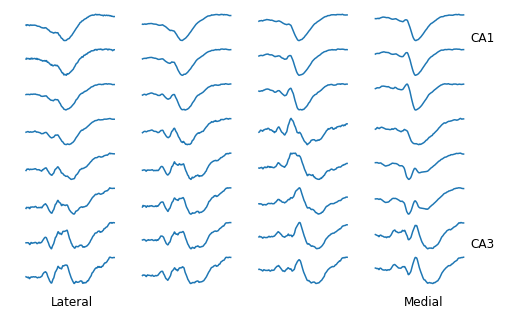

In [9]:
pep_mat = np.zeros((4, 8, 150, 5000))

for file_idx, file in enumerate(new_files):
    #print(f'File: {file_idx}')
    sweep = new_dir + file
    reader = intanIO(filename = sweep)
    reader.parse_header()
    size = reader.get_signal_size(block_index=0, seg_index=0,channel_indexes = [0]) # get the size of recording
    analog_1 = reader.get_analogsignal_chunk(block_index=0, seg_index=0,channel_indexes=[35], i_start = 0, i_stop = size) # read analog_in
    analog_scaled = reader.rescale_signal_raw_to_float(analog_1, dtype='float64', channel_indexes= [35])
    trigger_id, _ = signal.find_peaks(analog_scaled.flatten(), height = 1.5) # find trigger signal
    roi = (trigger_id[0], trigger_id[0]+5000) # region of interest within recording (100 ms before trigger to 1 sec after)

    for shank in A32_4x8:
        sh_idx = int(shank[-1])-1
        for ch_idx, channel in enumerate(A32_4x8[shank]):
            raw_sig = reader.get_analogsignal_chunk(block_index=0, seg_index=0,channel_indexes=[channel], i_start = roi[0], i_stop = roi[1]) # read analog_in
            sig_scaled = reader.rescale_signal_raw_to_float(raw_sig, dtype='float64', channel_indexes= [channel])
            lfp = signal.filtfilt(b[0], b[1], sig_scaled, axis = 0) # Zero-phase filter each trial

            pep_mat[sh_idx, ch_idx, file_idx, :] = lfp.flatten()-lfp.flatten().mean()

pep_mean = pep_mat.mean(2)

pep_32, axs = plt.subplots(nrows = 8, ncols = 4, figsize = (8, 5))
for column in range(4):
    for row in range(8):
        axs[row, column].plot(pep_mean[column, row])
        axs[row, column].set_axis_off()
plt.annotate('CA1', (0.92,0.87), xycoords = 'figure fraction', fontsize = 12)
plt.annotate('CA3', (0.92,0.23), xycoords = 'figure fraction', fontsize = 12)
plt.annotate('Medial', (0.79,0.05), xycoords = 'figure fraction', fontsize = 12)
plt.annotate('Lateral', (0.1,0.05), xycoords = 'figure fraction', fontsize = 12)

In [10]:
pep_32.savefig(save_dir+'/'+exp+'_all_probe.svg')